In [1]:
#coding: utf-8
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings #경고? 워닝 표시 무시하려하나보네.
warnings.filterwarnings("ignore")

In [2]:
import requests
from bs4 import BeautifulSoup
import re

In [3]:
#크롤링할 사이트 주소 정의
source_url = "http://namu.wiki/RecentChanges"

#사이트의 html 구조에 기반하여 크롤링을 후행합니다.
req = requests.get(source_url)
html = req.content
soup = BeautifulSoup(html, 'lxml')
contents_table = soup.find(name="table")
table_body = contents_table.find(name="tbody")
table_rows = table_body.find_all(name="tr")

In [4]:
#a태그의 href 속성을 리스트로 추출하여, 크롤링 할 페이지 리스트를 생성합니다.
page_url_base = "https://namu.wiki"
page_urls = []
for index in range(0, len(table_rows)):
    first_td = table_rows[index].find_all('td')[0]
    td_url = first_td.find_all('a')
    if len(td_url) > 0:
        page_url = page_url_base + td_url[0].get('href')
        if 'png' not in page_url:
            page_urls.append(page_url)
            
#중복 url을 제거합니다.
page_urls = list(set(page_urls))
for page in page_urls[:5]:
    print(page)

https://namu.wiki/w/%EC%97%B4%EC%87%A0%EC%A7%80%EA%B8%B0%20%EC%95%8C%EB%9D%BC%EB%B0%94%EC%8A%A4%ED%84%B0
https://namu.wiki/w/%EB%B0%95%EC%A5%90(%EC%98%81%ED%99%94)
https://namu.wiki/w/%EC%97%98%EB%A6%AC%EB%A9%98%ED%83%88%20%EB%82%98%EC%9D%B4%EC%B8%A0
https://namu.wiki/w/%ED%8C%8C%EC%9B%8C(%EC%B2%B4%EC%9D%B8%EC%86%8C%20%EB%A7%A8)
https://namu.wiki/w/%EB%B3%B4%EC%9D%B4%EB%8A%94%20%EC%97%AC%EA%B3%A0%EC%83%9D


In [5]:
req = requests.get(page_urls[0])
html = req.content
soup = BeautifulSoup(html, 'lxml')
contents_table = soup.find(name="article")
title = contents_table.find_all('h1')[0]
category = contents_table.find_all('ul')[0]
content_paragraphs = contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})
content_corpus_list = []

for paragraphs in content_paragraphs:
    content_corpus_list.append(paragraphs.text)
content_corpus = "".join(content_corpus_list)

print(title.text)
print("\n")
print(category.text)
print("\n")
print(content_corpus)

열쇠지기 알라바스터 


하스스톤/카드/무종족 하수인


1. 개요2. 상세3. 평가3.1. 출시 전3.2. 출시 후4. 기타 한글명  열쇠지기 알라바스터    영문명  Keymaster Alabaster  카드 세트  스칼로맨스 아카데미  카드 종류  하수인  등급  전설  직업 제한  공용  종족  -  황금 카드  제작 또는 카드팩  비용  7  공격력  6  생명력  8  효과 상대편이 카드를 뽑을 때마다 그 카드를 복사하여 내 손으로 가져옵니다. 그 카드의 비용이 (1)이 됩니다. 플레이버 텍스트 무수한 열쇠의 요청이...!(The key to his mastery is a solid stack of backup copies.)소환: 마음을 열고 마법을 받아들여라! (Unlock your mind!)공격: 네 정신을 열어주마! (Open yourself up to magic!)소환 시 음악은 전사의 여정(Warrior's Journey)이다. 1분 45초부터.하스스톤 확장팩 스칼로맨스 아카데미의 공용 전설 등급 하수인. 하스스톤 오리지널 캐릭터로, 스칼로맨스의 모든 열쇠를 책임지고 관리하는 직책을 맡은 복제의 교수 열쇠지기 알라바스터다.카드 한 장은 보장되어있지만 무작위성이 너무 심하고 무거운데 비해 바로 필드에 끼치는 영향도 없어서 별로다. 비용도 높아서 상대편도 같이 카드를 뽑게 하는 카드와 연계할 수 없는 것이 문제. 효과 자체는 사기에 가깝고 체력 스텟도 좋아 유사 도발 효과마저 내지만 저런 카드를 7코로 던져놓을 수 있을 만큼 여유로운 컨트롤 환경이 마련될 수 있느냐에 의문점이 많은 편. 역시 진화나 아무튼 소환됨의 1등상이 될 가능성이 높다.야생에서는 시린빛 점쟁이와 연계해 10코스트에 상대방의 카드 두 장을 1코스트로 복사해서 가져올 수 있다. 때문에 야생에서는 사적의 키카드가 될 수도 있을 것으로 보인다.대마녀 윌로우, 교수 슬레이트처럼 자체 스펙에 심각한 결함이 있는 건 아님에도 불구하고, 스칼로맨스 메타에서는 아무런 연구가 없는 상태

In [6]:
columns = ['title', 'category', 'content_text']
df = pd.DataFrame(columns = columns)

In [7]:
#각 페이지별 '제목', '카테고리', '본문' 정보를 데이터 프레임으로 만듭니다.
for page_url in page_urls:
    
    #사이트의 html 구조에 기반하여 크롤링을 수행합니다.
    req = requests.get(page_url)
    html = req.content
    soup = BeautifulSoup(html, 'lxml')
    contents_table = soup.find(name='article')
    title = contents_table.find_all('h1')[0]
    
    #카테고리 정보가 없는 경우를 확인합니다.
    if len(contents_table.find_all('ul')) > 0:
        category = contents_table.find_all('ul')[0]
    else:
        category = None
        
    content_paragraphs = contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})
    content_corpus_list = []
    
    #페이지 내 제목 정보에서 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체.
    if title is not None:
        row_title = title.text.replace("\n", " ")
    else:
        row_title = ""
        
    #페이지 내 본문 정보에서 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체.
    if content_paragraphs is not None:
        for paragraphs in content_paragraphs:
            if paragraphs is not None:
                content_corpus_list.append(paragraphs.text.replace("\n", " "))
            else:
                content_corpus_list.append((""))
    else:
        content_corpus_list.append("")
        
    #페이지 내 카테고리정보에서 "분류"라는 단어와 개행 문자를 제거한 뒤 추출.
    #만약 없는 경우, 빈 문자열로 대체.
    if category is not None:
        row_category = category.text.replace("\n", " ")
    else:
        row_category = ""
        
    #모든 정보를 하나의 데이터 프레임에 저장합니다.
    row = [row_title, row_category, "".join(content_corpus_list)]
    series = pd.Series(row, index=df.columns)
    df = df.append(series, ignore_index=True)

In [8]:
df.head()

,title,category,content_text
0,열쇠지기 알라바스터,하스스톤/카드/무종족 하수인,1. 개요2. 상세3. 평가3.1. 출시 전3.2. 출시 후4. 기타 한글명 열쇠...
1,박쥐(영화),한국 공포 영화로맨스 영화뱀파이어를 소재로 한 작품2009년 영화포커스 피처스박찬욱,역대 칸 영화제 심사위원상 제61회 (2008년) → 제62회 (2009년...
2,엘리멘탈 나이츠,모바일 게임/ㅇ닌텐도플레이스테이션 게임,엘리멘탈 나이츠 R (Elemental knights R)[1] 개발Winlight...
3,파워(체인소 맨),체인소 맨/등장인물,파워 소속 보기일본 데블 헌터 | 구성원 일람 [ 1권 ~ 11권 ]특이 4과리더 ...
4,보이는 여고생,일본 만화/ㅂ2018년 만화웹코믹호러 만화코미디 만화요괴를 소재로 한 작품,"보이는 여고생見える子ちゃん장르호러, 코미디작가이즈미 토모키출판사 카도카와 쇼텐 영상..."


In [9]:
#텍스트 정제 함수: 한글 이외의 문자는 전부 제거.
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = hangul.sub('', text)
    return result

In [10]:
print(text_cleaning(df['content_text'][0]))

 개요 상세 평가 출시 전 출시 후 기타 한글명  열쇠지기 알라바스터    영문명     카드 세트  스칼로맨스 아카데미  카드 종류  하수인  등급  전설  직업 제한  공용  종족    황금 카드  제작 또는 카드팩  비용    공격력    생명력    효과 상대편이 카드를 뽑을 때마다 그 카드를 복사하여 내 손으로 가져옵니다 그 카드의 비용이 이 됩니다 플레이버 텍스트 무수한 열쇠의 요청이           소환 마음을 열고 마법을 받아들여라   공격 네 정신을 열어주마     소환 시 음악은 전사의 여정 이다 분 초부터하스스톤 확장팩 스칼로맨스 아카데미의 공용 전설 등급 하수인 하스스톤 오리지널 캐릭터로 스칼로맨스의 모든 열쇠를 책임지고 관리하는 직책을 맡은 복제의 교수 열쇠지기 알라바스터다카드 한 장은 보장되어있지만 무작위성이 너무 심하고 무거운데 비해 바로 필드에 끼치는 영향도 없어서 별로다 비용도 높아서 상대편도 같이 카드를 뽑게 하는 카드와 연계할 수 없는 것이 문제 효과 자체는 사기에 가깝고 체력 스텟도 좋아 유사 도발 효과마저 내지만 저런 카드를 코로 던져놓을 수 있을 만큼 여유로운 컨트롤 환경이 마련될 수 있느냐에 의문점이 많은 편 역시 진화나 아무튼 소환됨의 등상이 될 가능성이 높다야생에서는 시린빛 점쟁이와 연계해 코스트에 상대방의 카드 두 장을 코스트로 복사해서 가져올 수 있다 때문에 야생에서는 사적의 키카드가 될 수도 있을 것으로 보인다대마녀 윌로우 교수 슬레이트처럼 자체 스펙에 심각한 결함이 있는 건 아님에도 불구하고 스칼로맨스 메타에서는 아무런 연구가 없는 상태이며 메타덱에 한번도 들지 못한 채 전형적인 예능용 카드 취급을 받고 있다 사제 하랜법사 빅전사 정도를 제외한 거의 모든 덱이 한끗차이의 필드 템포싸움에 집중하고 있으며 코스트에 카드 한 장 가져오는 정도의 성능으로는 그런 덱에서조차 채용할 만한 당위성이 떨어지는 것 때문에 결투기사 같은 마이너한 테마덱이나 사제 미러전까지 고려하는 지독한 이득충 사제 덱에서나 드문드문 보이는

In [11]:
#각 피처마다 데이터 전처리 적용.
df['title'] = df['title'].apply(lambda x : text_cleaning(x))
df['category'] = df['category'].apply(lambda x : text_cleaning(x))
df['content_text'] = df['content_text'].apply(lambda x : text_cleaning(x))
df.head()

,title,category,content_text
0,열쇠지기 알라바스터,하스스톤카드무종족 하수인,개요 상세 평가 출시 전 출시 후 기타 한글명 열쇠지기 알라바스터 영문명 ...
1,박쥐영화,한국 공포 영화로맨스 영화뱀파이어를 소재로 한 작품년 영화포커스 피처스박찬욱,역대 칸 영화제 심사위원상 제회 년 제회 년 제회 년 일 디보 피쉬...
2,엘리멘탈 나이츠,모바일 게임ㅇ닌텐도플레이스테이션 게임,엘리멘탈 나이츠 개발홈페이지유통플랫폼안드로이드운영체제 닌텐도 등급장르 어드...
3,파워체인소 맨,체인소 맨등장인물,파워 소속 보기일본 데블 헌터 구성원 일람 권 권 특이 과리더 마키마덴지 ...
4,보이는 여고생,일본 만화ㅂ년 만화웹코믹호러 만화코미디 만화요괴를 소재로 한 작품,보이는 여고생장르호러 코미디작가이즈미 토모키출판사 카도카와 쇼텐 영상출판미디어연재처...


In [12]:
#각 피처마다 말뭉치를 생성합니다.
title_corpus = "".join(df['title'].tolist())
category_corpus = "".join(df['category'].tolist())
content_corpus = "".join(df['content_text'].tolist())
print(title_corpus)

열쇠지기 알라바스터 박쥐영화 엘리멘탈 나이츠 파워체인소 맨 보이는 여고생 그래플러던전 앤 파이터여자 황혼의 숲아이템 우울장애 바이오하자드  매지카 드 스펠 스크루지 맥덕 강감찬 쿠키런 오븐브레이크탐정런 쿠키 미스터리시즌  김은별컴퍼니 뇌신 리일환   백정현 이지훈지붕뚫고 하이킥  다이노스년월 현무 탄도 미사일 김건희축구선수 환인유희왕 재미있는 게시판 급식러너등장인물 이탈리안 잡 스포츠 판타지 베인충 켄간 오메가등장인물 매디슨 범가너선수 경력 만감 박 일년 도로교통표지판 심볼리 루돌프 틀히어로즈 구단명 변천사   생물종 박보영 라디유 청설모 코로나바이러스감염증백신일본        주위클리 서바이벌 러브라이브  비판 및 문제점  스토리 전개 메레타 러츠 파일 투텐도 질투마녀 궤멸충 좀비고등학교은하고등학교 말보로 박명수별명 요괴종류 오다 히로야스  스사노오 유라원신 아마노 피카미   타이거즈년월 포켓몬스터평가 벨 크라넬 김양건 이상호성우 던전앤파이터직업 부산 도시철도 송도선 급식러너 오다 노부타다 에이지 오브 엠파이어 기병 서민우축구선수 쿠키런 킹덤건물   어시장 삼대째 모범택시드라마등장인물 드래곤 프린스 밍모 과거의 고통 이정현코치 기아 레이 슈퍼로봇대전  완결편공략 클래시 오브 클랜영웅 스킨 무리 군주 오락실서울 정연신 


In [14]:
!pip install JPype1-1.2.0-cp37-cp37m-win_amd64.whl

Processing c:\users\user\date16\jpype1-1.2.0-cp37-cp37m-win_amd64.whl


In [15]:
!pip install pytagcloud pygame simplejson

  Created wheel for pytagcloud: filename=pytagcloud-0.3.5-py3-none-any.whl size=759878 sha256=49916823441e8aa2fb7e4b5badbe5a406848968a4687661d6a67390eef99d927
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\fc\fd\aa\86956a295a7c9205bafd518ef4b6d489e51d2d476990c18238
Successfully built pytagcloud


In [17]:
!pip install konlpy

  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.1.0-py2.py3-none-any.whl (147 kB)
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [18]:
from konlpy.tag import Okt
from collections import Counter

In [19]:
#Konlpy의 형태소 분석기로 명사 단위의 키워드를 추출합니다.
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(content_corpus)
count = Counter(nouns)

In [20]:
count

Counter({'개요': 69,
         '상세': 14,
         '평가': 203,
         '출시': 115,
         '전': 602,
         '후': 470,
         '기타': 120,
         '한글': 18,
         '열쇠': 10,
         '지기': 12,
         '알라': 5,
         '바스': 15,
         '터': 137,
         '문명': 12,
         '카드': 224,
         '세트': 48,
         '스칼': 4,
         '로맨스': 17,
         '아카데미': 7,
         '종류': 46,
         '하수': 8,
         '등급': 47,
         '전설': 66,
         '직업': 158,
         '제한': 62,
         '공용': 10,
         '종족': 25,
         '황금': 18,
         '제작': 138,
         '팩': 49,
         '비용': 82,
         '공격': 675,
         '생명력': 13,
         '효과': 161,
         '상대편': 4,
         '때': 1119,
         '그': 1295,
         '복사': 10,
         '내': 350,
         '손': 123,
         '이': 1445,
         '플레이': 142,
         '버': 25,
         '텍스트': 5,
         '무수': 4,
         '요청': 30,
         '소환': 52,
         '마음': 164,
         '마법': 212,
         '네': 66,
         '정신': 142,
         '시': 362,


In [21]:
#한글자 키워드를 제거합니다.
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'문서': 3141, '문단': 3068, '이전': 2980, '역사': 2891, '때문': 988, '정도': 725, '게임': 724, '경우': 724, '쿠키': 722, '사람': 708, '공격': 675, '이후': 668, '시간': 627, '다른': 559, '레벨': 540, '자신': 515, '생각': 498, '사용': 480, '모습': 460, '시즌': 435, '하나': 431, '우울증': 417, '기체': 405, '캐릭터': 382, '대한': 380, '시작': 373, '경기': 372, '부분': 368, '유닛': 365, '사실': 357, '채널': 357, '위해': 349, '방송': 343, '등장': 342, '강호동': 338, '또한': 327, '내용': 327, '선수': 327, '상황': 318, '가장': 317, '능력': 312, '문제': 307, '일본': 307, '기병': 301, '상태': 296, '귀신': 281, '감염': 279, '란쥬': 278, '멤버': 277, '본인': 274, '추가': 274, '이름': 274, '이상': 269, '상대': 263, '레이': 259, '모두': 254, '대해': 253, '박보영': 251, '가지': 250, '아이': 250, '기록': 249, '도기': 249, '기본': 246, '다시': 245, '생산': 245, '이승기': 233, '방어': 232, '모든': 228, '속도': 227, '존재': 226, '선발': 226, '접종': 226, '카드': 224, '이유': 223, '스토리': 222, '무리': 222, '처음': 219, '수도': 214, '한국': 213, '대원': 213, '마법': 212, '스킬': 211, '이닝': 211, '체력': 209, '매우': 207, '자체': 206, '일부': 206, '언급': 205, '수준': 204, '평

In [23]:
#한국어 약식 불용어사전 예시 파일.
korean_stopwords_path = "C:/Users/User/Documents/data/korean_stopwords.txt"

#텍스트 파일 오픈
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
print(stopwords[:10])

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']


In [24]:
#나무위키 페이지에 맞는 불용어 추가
namu_wiki_stopwords = ['상위', '문서', '내용', '누설', '아래', '해당', '설명', '표기', '추가', '모든', '사용', '매우', '가장',
                       '줄거리', '요소', '상황', '편집', '틀', '경우', '때문', '모습', '정도', '이후', '사실', '생각', '인물', 
                       '이름', '년월']
for stopword in namu_wiki_stopwords:
    stopwords.append(stopword)

In [25]:
import random
import pytagcloud
import webbrowser

pygame 2.0.1 (SDL 2.0.14, Python 3.7.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [26]:
#가장 출력 빈도수가 높은 40개의 단어를 선정합니다.
ranked_tags = remove_char_counter.most_common(40)

#pytagcloud로 출력할 40개의 단어 입력. 단어 출력의 최대 크기는 80 제한.
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)

#pytagcloud 이미지 생성. 폰트는 나눔 고딕
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

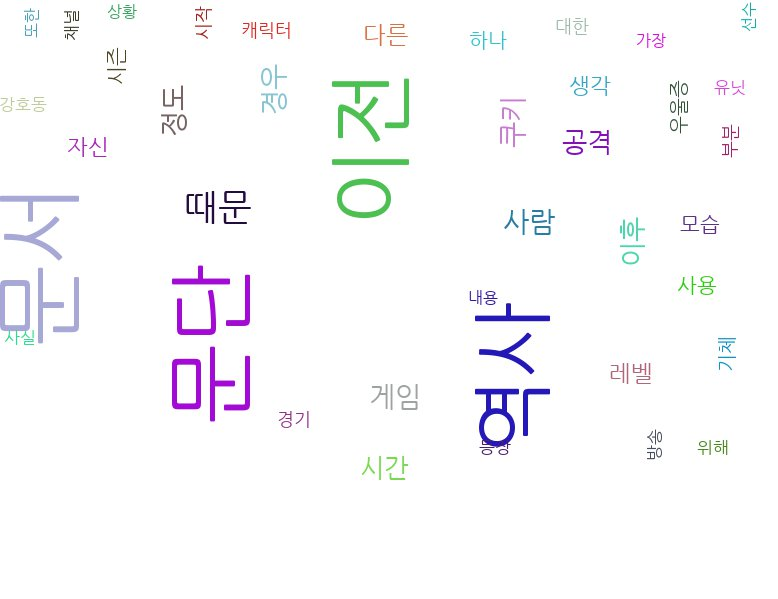

In [27]:
#생성한 이미지를 주피터 노트북상에서 출력.
from IPython.display import Image
Image(filename='wordcloud.jpg')

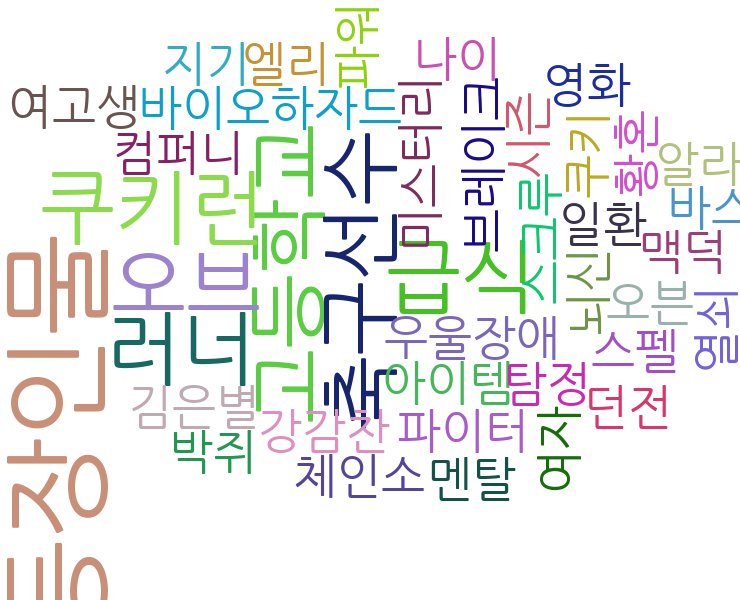

In [28]:
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(title_corpus)
count = Counter(nouns)

remove_char_counter = Counter({x: count[x] for x in count if len(x) > 1})
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})

ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)
pytagcloud.create_tag_image(taglist, 'title_wordcloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

Image(filename='title_wordcloud.jpg')

In [29]:
from konlpy.tag import Okt

In [30]:
t = Okt()

In [31]:
tokens_ko = t.nouns("나는 가방에 들어갈거야..가방..가방..잔짜야..진짜..진짜..진짜..진짜..오늘은 수요일이야..오늘")
tokens_ko

['나', '가방', '가방', '가방', '잔', '진짜', '진짜', '진짜', '진짜', '오늘', '수요일', '오늘']

In [32]:
import nltk

In [33]:
ko = nltk.Text(tokens_ko, name='test')

In [34]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm #폰트 관련 용도다.

%config InlineBackend.figure_format = 'retina'

In [36]:
import matplotlib.font_manager as fm
fontpath = 'D:/Anaconda3/Lib/site-packages/pytagcloud/fonts/NanumGothic.ttf'
font_name = fm.FontProperties(fname=fontpath, size=9).get_name()
plt.rc('font', family=font_name)

In [37]:
fm._rebuild()

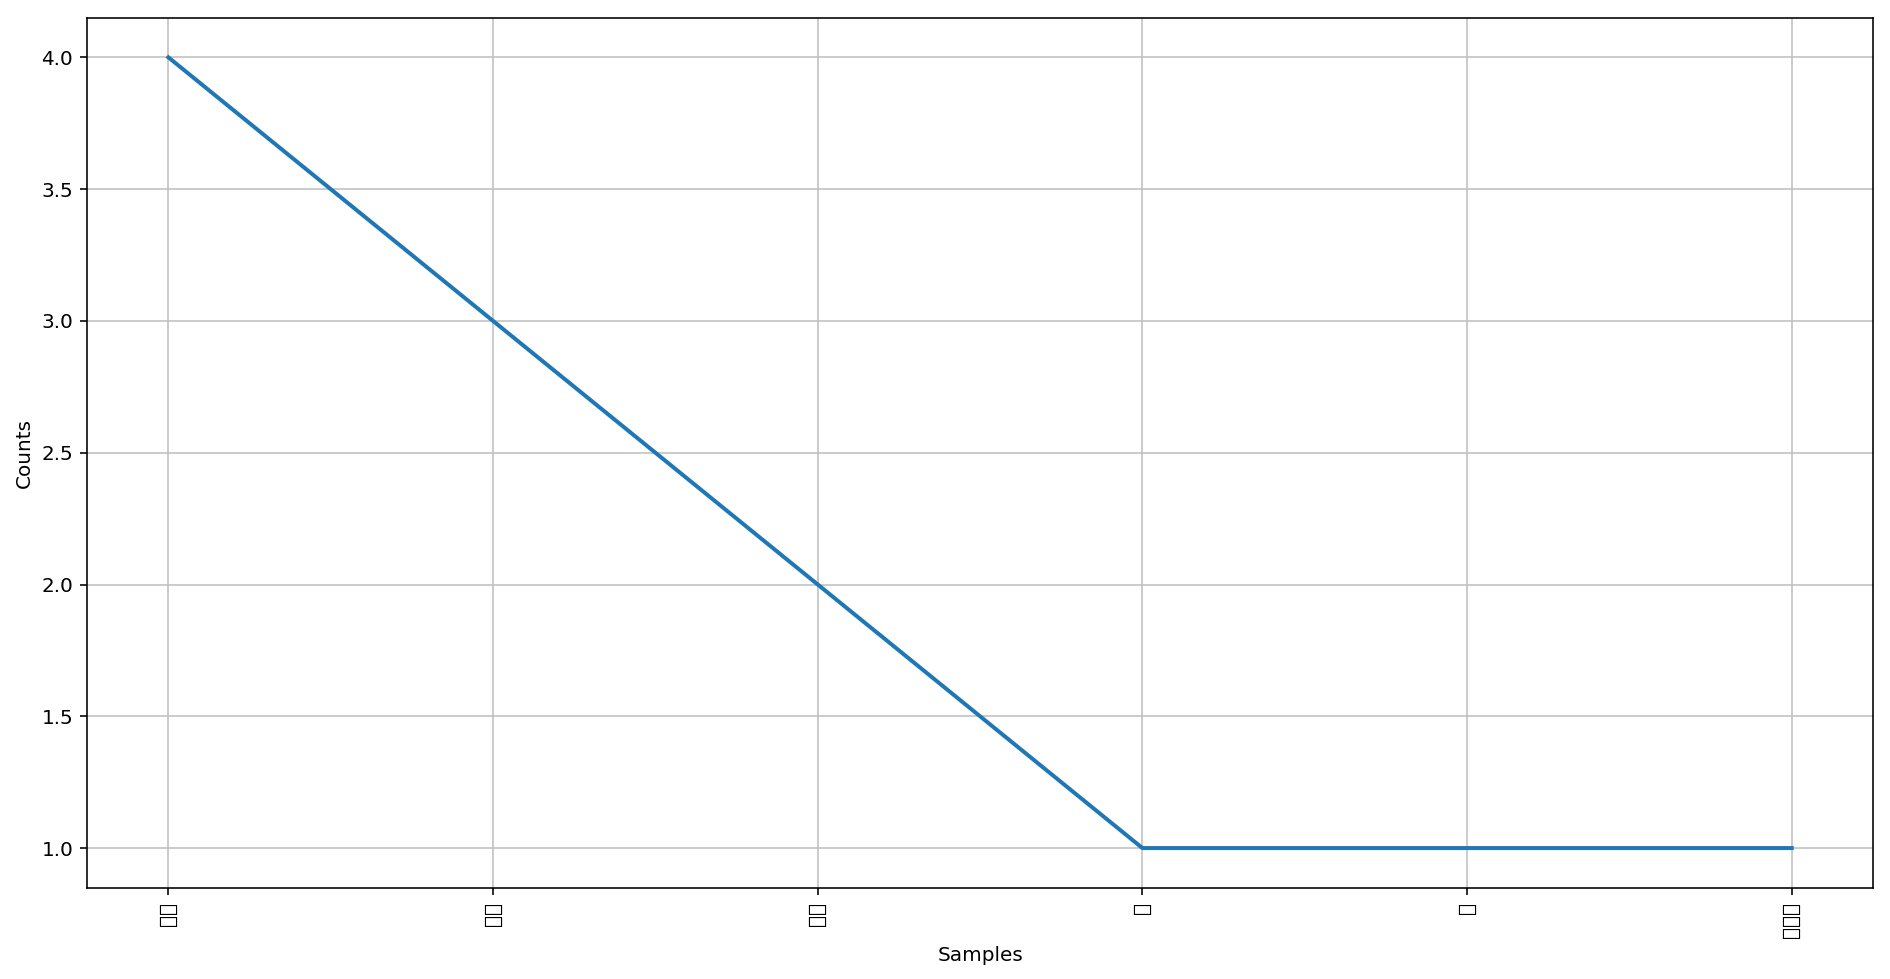

In [38]:
plt.figure(figsize=(16, 8))
ko.plot(50)
plt.show()